= Лабораторная работа 2: Классификация изображений рукописных цифр =

БВТ2202, Градов Артём Николаевич

Цель - описать модель для распознавания рукописных цифр, провести обучение на наборе данных MNIST

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = np.load('mnist.npz')
pixels = file['x_train'].astype("float32") / 255
labels = file['y_train']
print(pixels)
pixels = np.reshape(pixels, (pixels.shape[0], pixels.shape[1] * pixels.shape[2]))
print(pixels)
labels = np.eye(10)[labels]
print(labels)

train_pairs = list(zip(pixels, labels))

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[0. 0. 0.

In [29]:
# layers
W_in_to_hidden = np.random.uniform(-0.5, 0.5, (20, 784))
B_in_to_hidden = np.zeros((20,1))
W_hidden_to_out =  np.random.uniform(-0.5, 0.5, (10, 20))
B_hidden_to_out = np.zeros((10, 1))

learning_rate = 0.01
Losses = []
Epochs = 3
def sigmoid(a):
    return 1/(1+np.exp(-a))
for e in range(Epochs):
    
    loss = 0
    accuracy = 0 
    for image, label in train_pairs:
        image = np.reshape(image, (-1, 1))
        label = np.reshape(label, (-1, 1))     
        # forward
        hidden_layer = B_in_to_hidden + W_in_to_hidden @ image
        hidden_layer = sigmoid(hidden_layer)

        output = B_hidden_to_out + W_hidden_to_out @ hidden_layer
        output = sigmoid(output)

        # loss
        loss += 1 / len(output) * np.sum((output - label) ** 2, axis=0)
        accuracy += int(np.argmax(label) == np.argmax(output))

        # back
        W_hidden_to_out += -learning_rate * (output-label) @ np.transpose(hidden_layer)
        B_hidden_to_out += -learning_rate * (output-label)

        delta = np.transpose(W_hidden_to_out) @ (output-label) * (hidden_layer * (1 - hidden_layer))
        W_in_to_hidden += -learning_rate * delta @ np.transpose(image)
        B_in_to_hidden += -learning_rate * delta
    
    loss = round((loss[0] / pixels.shape[0]), 4)
    accuracy = round(accuracy / pixels.shape[0], 4)
    Losses.append(loss)
    print("EPOCH",e+1)
    print("Loss:", loss)
    print("Accuracy:", accuracy)



EPOCH 1
Loss: 0.0239
Accuracy: 0.8612
EPOCH 2
Loss: 0.0126
Accuracy: 0.9252
EPOCH 3
Loss: 0.0109
Accuracy: 0.9363


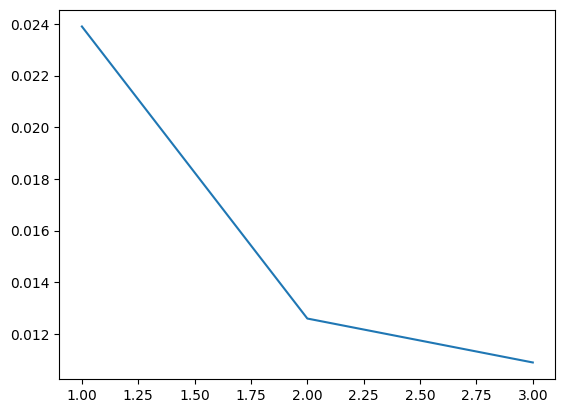

In [30]:
plt.plot([i+1 for i in range(Epochs)], Losses)
plt.show()

0.417


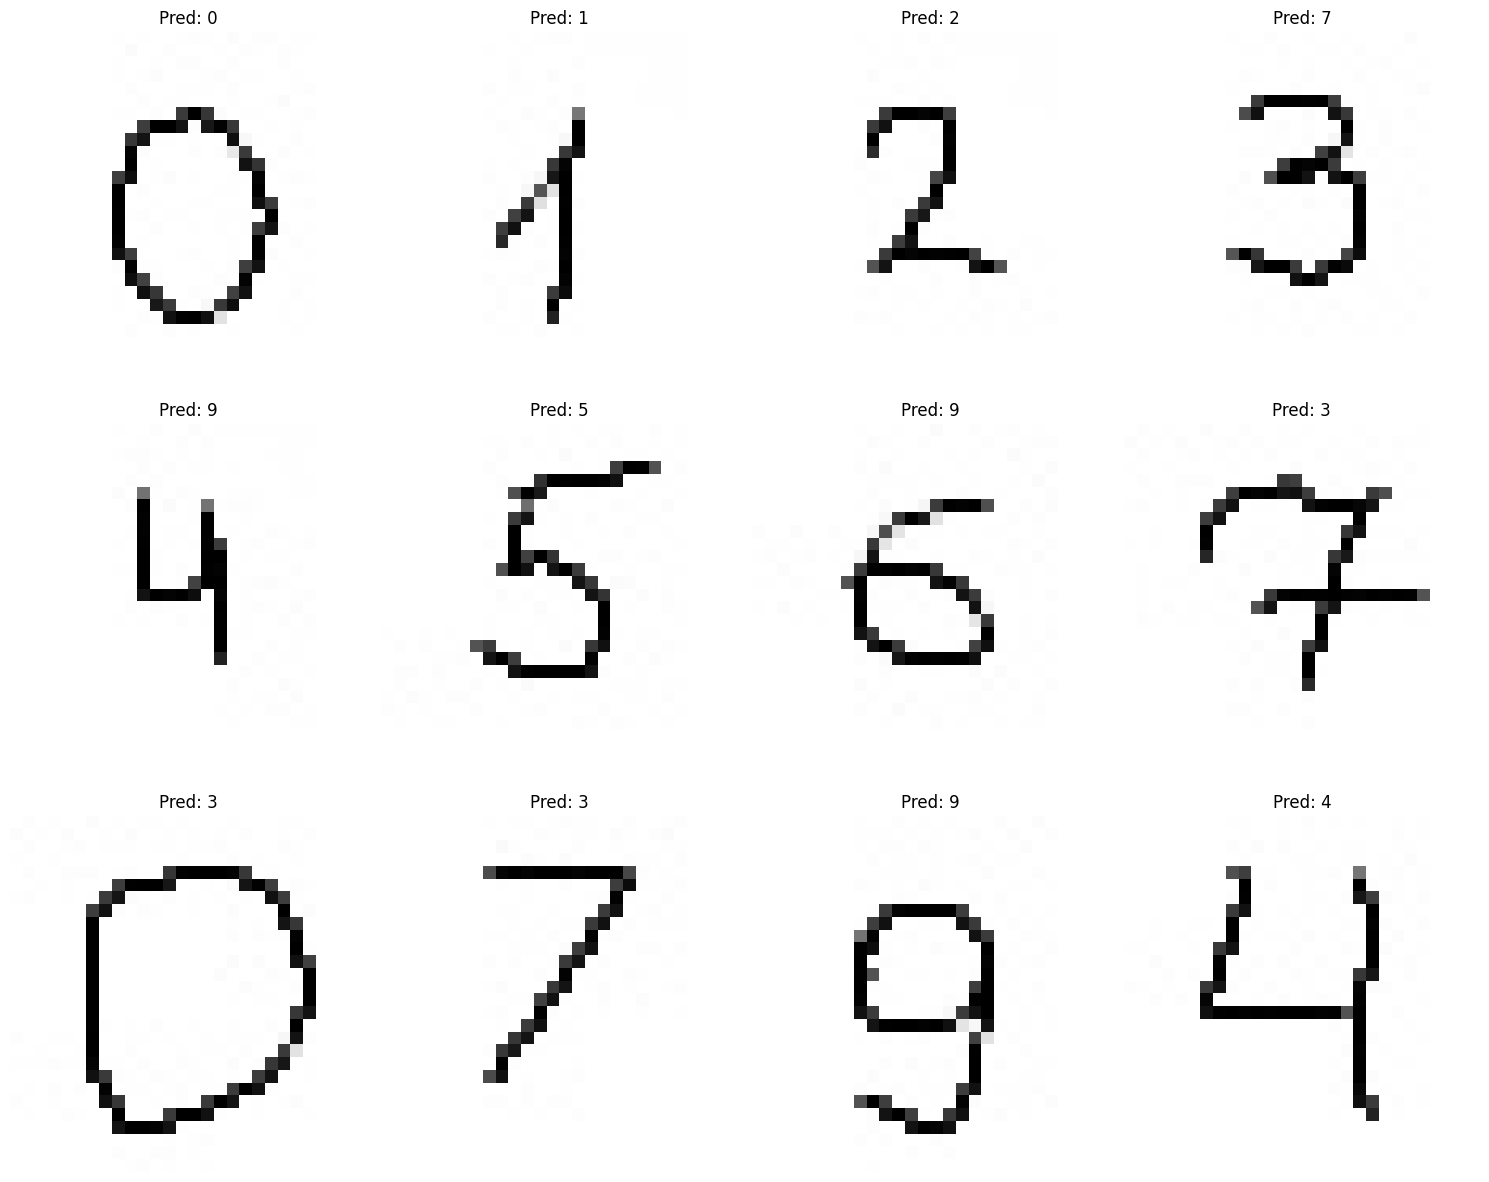

In [33]:
import os, re, math
def readTestData(path):
    images = []
    labels = []
    for file in os.listdir(path):
        if file.endswith(".jpg") or file.endswith(".png"):
            img_path = os.path.join(path, file)
            img= plt.imread(img_path)

            gray = lambda rgb: np.dot(rgb[..., :3], [0.299, 0.587, 0.114]) 
            img = gray(img).astype("float32") / 255

            img = np.reshape(img, (img.shape[0] * img.shape[1]))
            img_matrix = np.reshape(img, (-1, 1))      
            images.append(img_matrix)

            match = re.search(r'\d', file)
            # print(match)
            labels.append(match.group(0)) if match else labels.append("-")
                
        # print(labels)
    return images, labels

path = "testData"
images, labels = readTestData(path)
test_pairs = list(zip(images, labels))
predicted_labels = []
acc = 0

ncols = 4
nrows = math.ceil(len(images)/4)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()

for img, label in test_pairs:
    hidden = B_in_to_hidden + W_in_to_hidden @ img
    hidden = sigmoid(hidden) 

    output = B_hidden_to_out + W_hidden_to_out @ hidden
    output = sigmoid(output)
    # print(np.argmax(output), label)
    acc += int(int(label) == int(np.argmax(output)))
    predicted_labels.append(np.argmax(output))

for i in range(len(images)):
    # img = img.reshape(28, 28)
    ax = axes[i]
    ax.imshow(images[i].reshape(28, 28), cmap="Greys")
    ax.set_title(f"Pred: {predicted_labels[i]}")
    ax.axis('off')
    
print(np.round(acc/len(images),3))
plt.tight_layout()
plt.show()